In [1]:
# Rubric Notes: 

# target: 'TenYearCHD'
# Evaluation metric: 'accuracy_score'
# Baseline: '50% after using smote', 84% accuracy before smote

# Fit logistic regression and beat baseline: in cell 17
# Fit gradient boosting model and beat baseline: in cell 18


# Write 300+ words and report validation accuracy scores for models: 
#           - baseline: 50%
#           - regression: 62%
#           - xgb: 88%

# make 3+ visualizations, cells: 20,21,23,24,25, 15(lol)


# blog post link:  https://calebmckay1.github.io/2020-06-25-Risk-For-Coronary-Heart-Disease
# web app link:  https://the-heartdisease-dash-app8.herokuapp.com/ 

In [2]:
# other notes:

# - sysBP is the blood pressure when the heart contracts
# - diaBP is the blood pressure between heartbeats
# - totChol is the total cholestral level
# - currentSmoker: whether or not the patient is a current smoker
# - cigsPerDay: the number of cigarettes that the person smoked on average in one day

# - BPMeds: whether or not the patient was on blood pressure medication 
# - prevalentStroke: whether or not the patient had previously had a stroke 
# - prevalentHyp: whether or not the patient was hypertensive 
# - diabetes: whether or not the patient has diabetes 


# - age is age of patient
# - BMI: Body Mass Index
# - Heart Rate: heart rate
# - glucose: glucose level


#target:
 #  - TenYearCHD is the risk of developing coronary heart disease in the next 10 years 

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/calebmckay1/Unit_2_Build_Week/master/framingham.csv')

# import pandas and used pandas to read the csv into a dataframe called 'df'

In [4]:
target = 'TenYearCHD'
df[target].value_counts(normalize=True)

# set the target for my model ' TenYearCHD' - ten year coronary heart disease risk for baeline
# set a baseline, the classes are skewed. We'll fix that later.

0    0.848042
1    0.151958
Name: TenYearCHD, dtype: float64

In [5]:
df.head()

# viewed the first 5 rows, and their columns

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
df.isnull().sum()

# viewed the amount of missing values in the dataframe

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()

# profile

## can't save it if i keep this cell outputted..
# used this code to view a grand summary of all the rows and columns of the dataframe

In [8]:
df['education'] = df['education'].fillna(value=df['education'].mode()[0])
df['cigsPerDay'] = df['cigsPerDay'].fillna(value=df['cigsPerDay'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(value=df['BPMeds'].mode()[0])
df['totChol'] = df['totChol'].fillna(value=df['totChol'].mean())
df['BMI'] = df['BMI'].fillna(value=df['BMI'].mean())
df['heartRate'] = df['heartRate'].fillna(value=df['heartRate'].mode()[0])
df['glucose'] = df['glucose'].fillna(value=df['glucose'].mean())

# filled the missing values with the mode for binary columns, and mean for integer columns

In [9]:
df.shape

# viewed the shape of the dataframe 

(4238, 16)

In [10]:
df.isnull().sum()

# doubled checked that the missing values were filled

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.2, random_state=42)
train,val = train_test_split(train,test_size=0.2, random_state=42)
# ready to split. Used train test split to split df to train,test with 20% of data going to test. 

In [12]:
train.shape, test.shape, val.shape

# viewed the shape of test val and train 

((2712, 16), (848, 16), (678, 16))

In [13]:
train.columns

# viewed the columns of train to use them for features

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
target = 'TenYearCHD'
features = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

# created the target subsets, and the features subset for x and y 

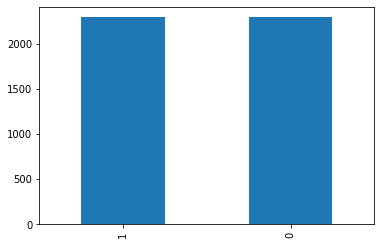

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)

x_train_new, y_train_new = sm.fit_resample(x_train, y_train)

# imported smote to balance out the majority classes, and fit to train

pd.Series(y_train_new).value_counts().plot.bar();

# viewed the targets value counts and it looks like the 
# the classes are now balanced for the train data

In [16]:
y_train_new.value_counts(normalize=True)

# viewed value counts, classes now roughly 50/50

1    0.5
0    0.5
Name: TenYearCHD, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(max_iter=20, solver = 'lbfgs')
# insantiated


lr.fit(x_train_new, y_train_new)
# fit


train_pred = lr.predict(x_train_new)
val_pred = lr.predict(x_val)

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train_new))
print('Accuracy score for Validation Dataset = ', accuracy_score(val_pred, y_val))

# the logistic regression model had a higher accuracy score than the baseline of 50% so thats good.

Accuracy score for Training Dataset =  0.6053205407762756
Accuracy score for Validation Dataset =  0.6474926253687315


/home/cjmckay7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(XGBClassifier(n_estimators=25,
                  random_state=42,
                  n_jobs=-1)
)

pipeline.fit(x_train_new, y_train_new);

train_predict = pipeline.predict(x_train_new)
val_predict = pipeline.predict(x_val)
test_predict = pipeline.predict(x_test)

# used x_test and x_train to predict the target data

print('Training Accuracy:', accuracy_score(train_predict, y_train_new))
print('Validation Accuracy:', accuracy_score(val_predict, y_val))
print('Testing Accuracy: ', accuracy_score(test_predict, y_test))

# could be overfitting since the accuracy is high for the train data


Training Accuracy: 0.9358918447448757
Validation Accuracy: 0.8126843657817109
Testing Accuracy:  0.8231132075471698


In [19]:
x_test.columns

# viewed columns to select a feature for isolation

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


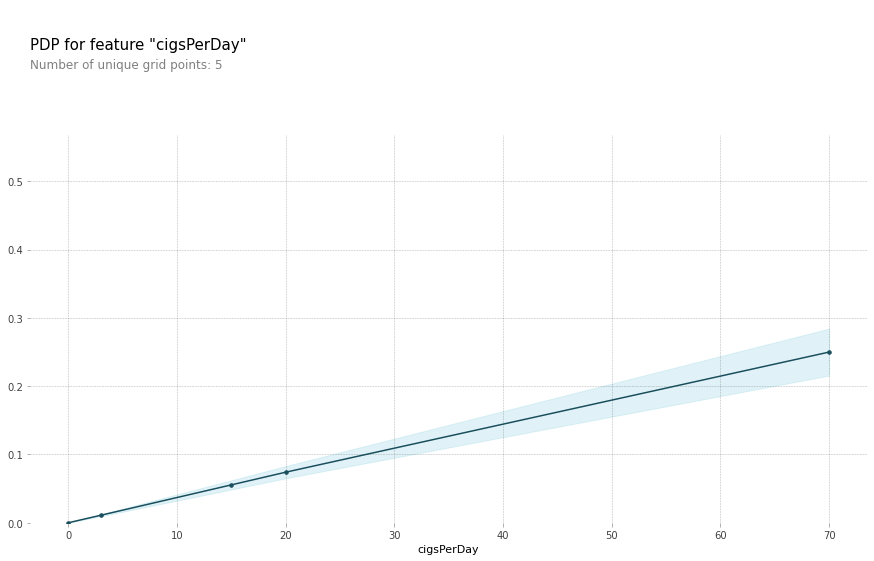

In [20]:
from pdpbox.pdp import pdp_isolate, pdp_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

feature = 'cigsPerDay'

isolated = pdp_isolate(
    model=lr,
    dataset=x_test,
    model_features=x_test.columns,
    feature=feature
)
# created isolation using pdp_isolate

pdp_plot(isolated, feature_name=feature);
# plotted isolated

In [21]:
import shap
import xgboost as xgb
xgb_model = xgb.train({'objective':'reg:logistic'}, xgb.DMatrix(x_train_new, label=y_train_new))

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=x_test)

In [22]:
model = XGBClassifier(random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [23]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=6,
    random_state=42
)

permuter.fit(x_val, y_val)
feature_names = x_val.columns.tolist()

eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)


# viewed feature importances. Really cool!

Weight,Feature
0.0098 ± 0.0085,age
0.0071 ± 0.0065,diaBP
0.0069 ± 0.0100,BMI
0.0059 ± 0.0059,glucose
0.0054 ± 0.0070,male
0.0042 ± 0.0095,cigsPerDay
0.0029 ± 0.0109,totChol
0.0022 ± 0.0097,sysBP
0.0017 ± 0.0036,currentSmoker
0.0005 ± 0.0124,heartRate


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


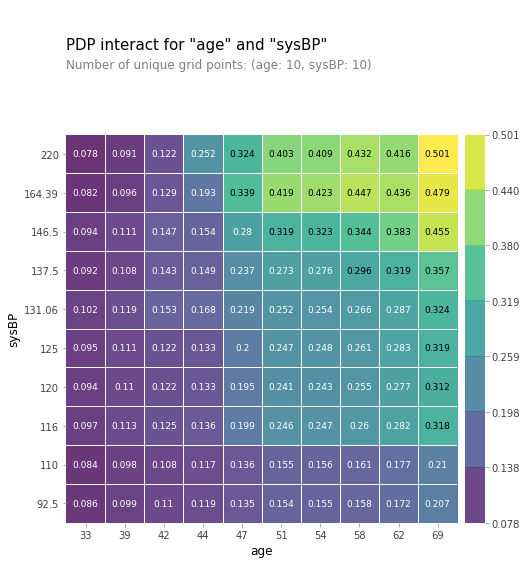

In [24]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['age', 'sysBP']

interaction = pdp_interact(
  model=pipeline,
  dataset=x_val,
  model_features=x_val.columns,
  features=features 
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

# viewed feature interaction between the top 2 features in importance

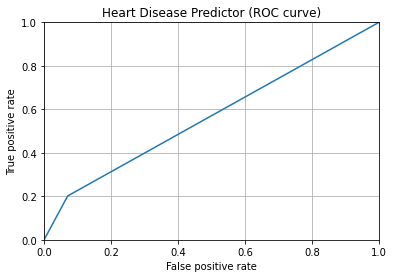

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
false_rate, true_rate, _ = roc_curve(y_test, test_predict)
plt.plot(false_rate,true_rate)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Heart Disease Predictor (ROC curve)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.grid(True)

# plotted roc auc 

In [26]:
from sklearn.metrics import roc_auc_score

y_prob_val = pipeline.predict_proba(x_val)[:, 1]
roc_auc_score(y_val, y_prob_val)

# roc_auc score for validation which has equal classes

0.6714141084819054

In [27]:
y_prob_test = pipeline.predict_proba(x_test)[:, 1]
roc_auc_score(y_test, y_prob_test)

# roc auc score for test which has skewed classes 85/15

0.670713776510426

In [28]:
####$$$$$ ----- MAIN MODEL FOR WEB APP ------$$$$$####

#         |
#         |
#         V

In [29]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pickle

mymodel = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
# insantiated

x_train_web = x_train[['age', 'cigsPerDay','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

x_test_web = x_test[['age', 'cigsPerDay','totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
# dropped certain columns that didnt have much feature importance

mymodel.fit(x_train_web, y_train)

y_preds = mymodel.predict(x_test_web)
accuracy_score(y_test, y_preds)
## better than the xgboost before using smote

0.8325471698113207

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds)

array([[695,  29],
       [113,  11]])

In [31]:
x_train_web.head()

# viewed the head to match up the columns

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
882,52,20.0,225.0,156.0,98.0,30.93,80.0,100.0
4231,58,0.0,187.0,141.0,81.0,24.96,80.0,81.0
2552,51,6.0,190.0,131.5,89.0,23.66,92.0,100.0
2376,60,0.0,264.0,137.0,80.0,29.99,65.0,58.0
1496,40,15.0,304.0,121.0,88.0,22.52,60.0,80.0


In [32]:
new_obs=[[39,6,225,130,81,30,70,90]]
new_obs=np.array(new_obs)

# created new data to test the model

In [33]:
mymodel.predict(new_obs)

# used the data that was input to determine the risk, model predict no current risk for heart disease

array([0])

In [34]:
mymodel.kneighbors(new_obs)

(array([[11.03787359, 13.41402624, 13.54922335, 13.58322863, 15.25047212]]),
 array([[1631, 2150, 2380, 1793,  638]]))

In [35]:
for k in [5,10,15,20,25]:
    mymodel = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    mymodel.fit(x_train, y_train)
    y_preds = mymodel.predict(x_test)
    file = open(f'resources2/model_k{k}.pkl', 'wb')
    pickle.dump(mymodel, file)
    file.close()

In [36]:
df.describe()

# used describe to get the mean, min, max for my web app sliders

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.954696,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878716,81.966753,0.151958
std,0.495022,8.572160,1.018510,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025185,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000
